<a href="https://colab.research.google.com/github/ino-code11/ino-code11/blob/main/AI%E3%81%A7%E7%94%BB%E5%83%8F%E8%AA%8D%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git
!rm datasets/LICENSE

fatal: destination path 'datasets' already exists and is not an empty directory.


In [ ]:
!ls datasets

choki  gu  pa


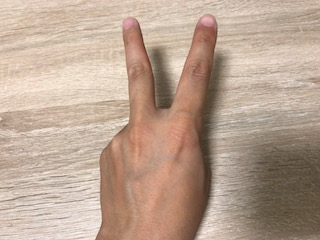

In [ ]:
import IPython
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('datasets/choki/choki_01.jpg'))

In [ ]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (235 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 155514 files and directories currently install

In [ ]:
!tree -d datasets

datasets
├── choki
├── gu
└── pa

3 directories


In [ ]:
dataset_original_dir = 'datasets'
dataset_root_dir = 'target_datasets'

In [ ]:
!wget https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

--2022-04-28 08:06:37--  https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2683 (2.6K) [text/plain]
Saving to: ‘split_train_val.py’

split_train_val.py  100%[===================>]   2.62K  --.-KB/s    in 0s      

2022-04-28 08:06:38 (31.7 MB/s) - ‘split_train_val.py’ saved [2683/2683]



In [ ]:
import split_train_val

split_train_val.image_dir_train_val_split(
    dataset_original_dir, dataset_root_dir, train_size = 0.67)

datasets/choki copy is done
datasets/pa copy is done
datasets/gu copy is done
processing is done


In [ ]:
!tree -d target_datasets

target_datasets
├── train
│   ├── choki
│   ├── gu
│   └── pa
└── val
    ├── choki
    ├── gu
    └── pa

8 directories


In [ ]:
!ls target_datasets/train/choki
!ls target_datasets/val/choki

IMG_0770.JPG  IMG_0785.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0875.JPG
IMG_0771.JPG  IMG_0786.JPG  IMG_0798.JPG  IMG_0813.JPG	IMG_0876.JPG
IMG_0773.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0814.JPG	IMG_0879.JPG
IMG_0775.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0815.JPG	IMG_0880.JPG
IMG_0776.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0816.JPG	IMG_0882.JPG
IMG_0779.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0817.JPG	IMG_0883.JPG
IMG_0782.JPG  IMG_0793.JPG  IMG_0807.JPG  IMG_0818.JPG	IMG_0884.JPG
IMG_0783.JPG  IMG_0795.JPG  IMG_0809.JPG  IMG_0872.JPG	IMG_0885.JPG
IMG_0784.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0874.JPG
choki_01.jpg  IMG_0780.JPG  IMG_0799.JPG  IMG_0812.JPG	IMG_0878.JPG
IMG_0772.JPG  IMG_0781.JPG  IMG_0800.JPG  IMG_0870.JPG	IMG_0881.JPG
IMG_0774.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0871.JPG
IMG_0777.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0873.JPG
IMG_0778.JPG  IMG_0794.JPG  IMG_0808.JPG  IMG_0877.JPG


In [ ]:
train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

In [ ]:
import sys
import os
import shutil

backup_dir = './model'

In [ ]:
labels = [d for d in os.listdir(dataset_original_dir) \
          if os.path.isdir(os.path.join(dataset_original_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
  shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
  for label in labels:
    f.write(label+"\n")

NUM_CLASSES = len(labels)
print("calss number=" + str(NUM_CLASSES))

calss number=3


In [ ]:
!cat ./model/labels.txt

choki
gu
pa


In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
from re import X
%tensorflow_version 2.X
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.X`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.0


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
labels = []
with open(backup_dir + '/labels.txt','r') as f:
  for line in f:
    labels.append(line.rstrip())
print(labels)

['choki', 'gu', 'pa']


In [ ]:
NUM_CLASSES = len(labels)

In [ ]:
#学習率:学習が進むスピード
LEARNING_RATE = 0.001
#エポック(世代数)：学習させる回数
EPOCHS = 20
#バッチサイズ：一度に学習させるデータの数
BATCH_SIZE = 8

In [ ]:
import re
IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode ='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical',shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE,IMAGE_SIZE),
    color_mode='rgb',batch_size=BATCH_SIZE,
    class_mode='categorical',shuffle=True)

Found 111 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


In [ ]:
(image_data,label_data) = train_data.next()

print(image_data.shape)
print(label_data.shape)

(8, 64, 64, 3)
(8, 3)


意味：
image_data ⇀ BATCH_SIZE(一度に学習させるデータの数)で指定した数の64×64のサイズの画像データ、3はRGBのチャンネル数。
label_data ⇀ BATCH_SIZEで指定した数のラベルのデータ、3はchoki/gu/paの3種類。

In [ ]:
print(image_data)
print(label_data)

[[[[0.8431373  0.74509805 0.6666667 ]
   [0.86666673 0.7843138  0.7176471 ]
   [0.8078432  0.7176471  0.654902  ]
   ...
   [0.76470596 0.6901961  0.62352943]
   [0.7058824  0.62352943 0.54901963]
   [0.7137255  0.627451   0.54509807]]

  [[0.854902   0.7686275  0.6862745 ]
   [0.85098046 0.7686275  0.69411767]
   [0.8313726  0.74509805 0.6627451 ]
   ...
   [0.65882355 0.58431375 0.5176471 ]
   [0.60784316 0.5254902  0.45098042]
   [0.7568628  0.67058825 0.5882353 ]]

  [[0.8588236  0.7725491  0.6901961 ]
   [0.8196079  0.7372549  0.6627451 ]
   [0.80392164 0.7254902  0.6313726 ]
   ...
   [0.65882355 0.5764706  0.50980395]
   [0.68235296 0.6        0.53333336]
   [0.6745098  0.5921569  0.5176471 ]]

  ...

  [[0.9450981  0.87843144 0.83921576]
   [0.9333334  0.86666673 0.82745105]
   [0.91372555 0.8470589  0.8078432 ]
   ...
   [0.00392157 0.         0.00784314]
   [0.00784314 0.00784314 0.01568628]
   [0.         0.         0.00784314]]

  [[0.882353   0.82745105 0.7843138 ]
   [0.8

image_dataの中身はnumpy.ndarray形式の画像データ。
0～255の範囲の整数値のRGB配列がTenflowで扱えるように、0～1.0の範囲の数値配列に変換したもの。最後の単位数列みたいなやつは、label_data。[0,0,1]なら三番目が1なので、paを表す。

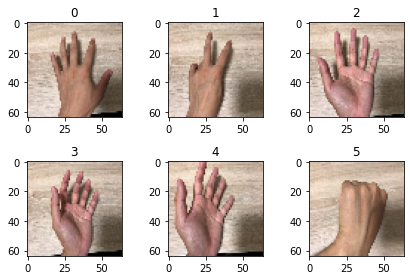

In [ ]:
import matplotlib.pyplot as plt
image_numb = 6 #3の倍数を指定
for i in range(0, image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(image_data[i])


AIモデルの作成。
MNISTと呼ばれる手書き数字認識のデータセットに使われるモデルをベースに、
RGBに対応できるように改造。
input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)と最後を3にすることで対応している。

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
    input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_craossentropy',
    metrics = ['accuracy'] 
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


こいつが畳み込みニューラルネットワークです！！！
CNNです！！
畳み込み層(Conv2D)、マックスプーリング層(MaxPooling2D)、ReLU層(Activation)、ドロップアウト層(Dropout)といった様々な機能を持つニューラルネットワークが結合されて構成されている。800万近くパラメータを持っているよ！

畳み込み層では、畳み込み演算という画像処理の分野フィルタ処理と呼ばれる演算を行う。畳み込み演算では、画像の全ての画素に対して、周囲の画素データの重み付きの和の合計を求める演算(畳み込み積分)を行う。

In [ ]:
#@title
model.compile()
model.run_eagerly = True

history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

ValueError: ignored

なんど上のコード1文で！！！学習するらしい、20秒ぐらいかけて。
%%time1はGoogle Colabのマジックコマンドで、セルの計算にかかった時間を計測する。